In [56]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
def get_yahoo_finance_data(ticker: str, start_date: str = None, end_date: str = None):
    # Create a ticker object
    stock = yf.Ticker(ticker)
    
    # Fetch historical market data
    hist = stock.history(period="max", start=start_date, end=end_date)
    
    # Return the data
    return hist

# Example usage
ticker = '^GSPC'  # Apple Inc. ticker symbol
data = get_yahoo_finance_data(ticker)

# Display the data
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,0.0,0.0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,0.0,0.0
2024-07-25 00:00:00-04:00,5428.700195,5491.589844,5390.950195,5399.220215,4592120000,0.0,0.0


In [4]:
tickers = {
    "S&P500": "^GSPC",
    "Crude Oil": "CL=F",
    "Silver": "SI=F",
    "Iron": "TIO=F",
    "NIFTY 50": "^NSEI",
    "NYSE Composite": "^NYA",
    "Candian Dollar": "CNY=X",
    "Euro": "EUR=X",
}
print(len(tickers))

8


In [5]:
# Get dataframes
dfs = {
    name: get_yahoo_finance_data(ticker) for name, ticker in tickers.items()
}

# Convert indices to date-only format and find the intersection of all dates
common_dates = set.intersection(*(set(df.index.date) for df in dfs.values()))

# Find the earliest common date
earliest_common_date = min(common_dates)

print(f"The earliest common date is: {earliest_common_date}")

# Filter dataframes to the common date range
dfs = {name: df.loc[str(earliest_common_date):] for name, df in dfs.items()}

The earliest common date is: 2010-10-14


In [6]:
dfs["Euro"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-10-14 00:00:00+01:00,0.71587,0.71597,0.70827,0.71596,0,0.0,0.0
2010-10-15 00:00:00+01:00,0.71073,0.71464,0.70681,0.71063,0,0.0,0.0
2010-10-18 00:00:00+01:00,0.71577,0.72265,0.71561,0.71611,0,0.0,0.0
2010-10-19 00:00:00+01:00,0.71747,0.72603,0.71459,0.71757,0,0.0,0.0
2010-10-20 00:00:00+01:00,0.72780,0.72969,0.71515,0.72785,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-23 00:00:00+01:00,0.91829,0.92213,0.91740,0.91829,0,0.0,0.0
2024-07-24 00:00:00+01:00,0.92160,0.92364,0.92026,0.92160,0,0.0,0.0
2024-07-25 00:00:00+01:00,0.92255,0.92342,0.92044,0.92255,0,0.0,0.0


In [48]:
gold_df = pd.read_excel("Gold_Prices.xlsx", sheet_name="Daily", skiprows=5,usecols=[2, 3],)\
    .rename(columns={"Unnamed: 2": "Date"}).set_index("Date").loc[str(earliest_common_date):]

gold_df

,USD
Date,
2010-10-14,1373.25
2010-10-15,1367.50
2010-10-18,1367.25
2010-10-19,1339.00
2010-10-20,1339.00
...,...
2024-07-22,2392.70
2024-07-23,2403.10
2024-07-24,2421.45


In [27]:
for name, df in dfs.items():
    df.index = df.index.date
    dfs[name] = df

In [43]:
combined_df = pd.DataFrame(index=dfs["S&P500"].index)
rel_column = "Close"

for feature, df in dfs.items():
    combined_df[f"{feature}_{rel_column}"] = df['Close']
    # print(df['Close'])
combined_df.index = pd.DatetimeIndex(combined_df.index)

combined_df

,S&P500_Close,Crude Oil_Close,Silver_Close,Iron_Close,NIFTY 50_Close,NYSE Composite_Close,Candian Dollar_Close,Euro_Close
2010-10-14,1173.810059,82.690002,24.417000,148.789993,6177.350098,7546.589844,6.6560,0.71596
2010-10-15,1176.189941,81.250000,24.271999,146.000000,6062.649902,7520.600098,6.6434,0.71063
2010-10-18,1184.709961,83.080002,24.396999,143.070007,6075.950195,7571.100098,6.6310,0.71611
2010-10-19,1165.900024,79.489998,23.764000,140.919998,6027.299805,7423.649902,6.6342,0.71757
2010-10-20,1178.170044,81.769997,23.848000,142.880005,5982.100098,7523.810059,6.6346,0.72785
...,...,...,...,...,...,...,...,...
2024-07-23,5555.740234,76.959999,29.132000,107.790001,24479.050781,18518.339844,7.2727,0.91829
2024-07-24,5427.129883,77.589996,29.115999,107.470001,24413.500000,18308.419922,7.2743,0.92160
2024-07-25,5399.220215,78.279999,27.806999,107.139999,24406.099609,18344.460938,7.2612,0.92255
2024-07-26,5459.100098,77.160004,27.860001,106.860001,24834.849609,18564.480469,7.2301,0.92155


In [51]:
combined_df["gold_price"] = gold_df["USD"]
combined_df.dropna()

,S&P500_Close,Crude Oil_Close,Silver_Close,Iron_Close,NIFTY 50_Close,NYSE Composite_Close,Candian Dollar_Close,Euro_Close,gold_price
2010-10-14,1173.810059,82.690002,24.417000,148.789993,6177.350098,7546.589844,6.6560,0.71596,1373.25
2010-10-15,1176.189941,81.250000,24.271999,146.000000,6062.649902,7520.600098,6.6434,0.71063,1367.50
2010-10-18,1184.709961,83.080002,24.396999,143.070007,6075.950195,7571.100098,6.6310,0.71611,1367.25
2010-10-19,1165.900024,79.489998,23.764000,140.919998,6027.299805,7423.649902,6.6342,0.71757,1339.00
2010-10-20,1178.170044,81.769997,23.848000,142.880005,5982.100098,7523.810059,6.6346,0.72785,1339.00
...,...,...,...,...,...,...,...,...,...
2024-07-22,5564.410156,79.779999,29.124001,108.160004,24509.250000,18539.140625,7.2690,0.91750,2392.70
2024-07-23,5555.740234,76.959999,29.132000,107.790001,24479.050781,18518.339844,7.2727,0.91829,2403.10
2024-07-24,5427.129883,77.589996,29.115999,107.470001,24413.500000,18308.419922,7.2743,0.92160,2421.45
2024-07-25,5399.220215,78.279999,27.806999,107.139999,24406.099609,18344.460938,7.2612,0.92255,2364.20


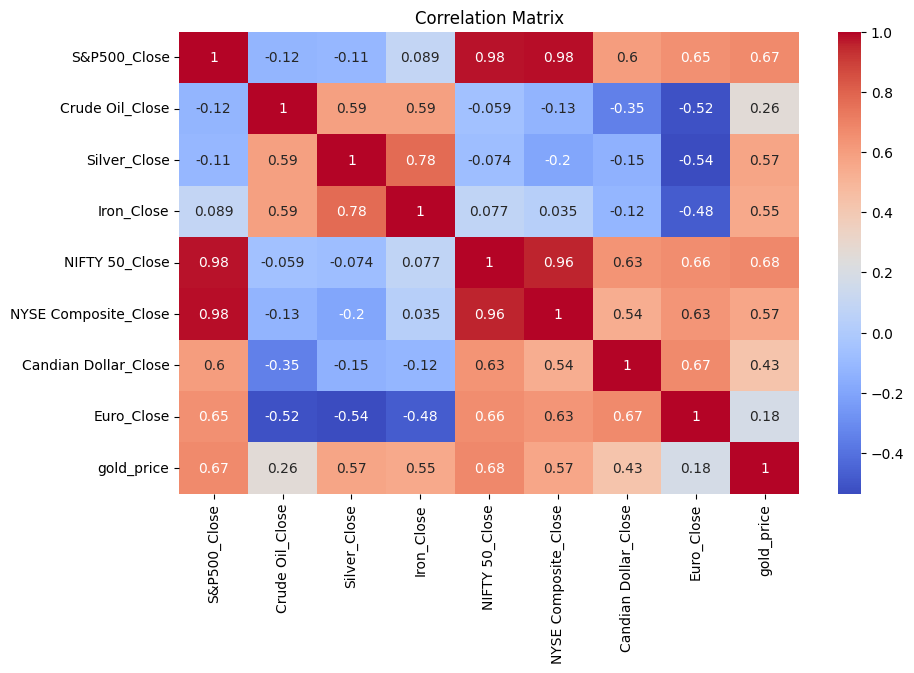

In [60]:

# Step 2: Calculate the Correlation Matrix
correlation_matrix = combined_df.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
